In [19]:
import requests
from bs4 import BeautifulSoup as soup
from random import randint
from time import sleep

# Get request from url
a = 'https://www.tripadvisor.com/Hotel_Review-g297628-d1400046-Reviews-Hotel_City_Centaur-Bengaluru_Bangalore_District_Karnataka.html'
a = a[:(a.find('Reviews')+7)] + '-or{}' + a[(a.find('Reviews')+7):]

reviews = []

headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36'}

html = requests.get(a, headers = headers)
element = soup(html.content, 'lxml')

#Extracting number of review
no_review = element.findAll('span', class_ = "HFUqL")
no_review1 = no_review[0].text.replace(" reviews", "") # Deleting 'reviews' 
no_review2 = int(no_review1.replace(",", "")) # Deleting ','
print("There are",no_review2,"reviews in this hotel")
    
for i in range((no_review2//5)+1):
    j = 5*i
    a_new = a.replace("{}",str(j))
    html = requests.get(a_new, headers = headers)
    sleep(1)
    bsobj = soup(html.content, 'lxml')
    for r in bsobj.findAll('q'):
        reviews.append(r.span.text.strip())

print("Review scrapping completed!")

There are 97 reviews in this hotel
Review scrapping completed!


In [20]:
res = []
for i in reviews:
    if i not in res:
        res.append(i)

In [21]:
#print("------------------------------")
#print("Printing the reviews")
#print("------------------------------")
#for i in range(len(res)):
#    print(res[i],"\n")

# Data cleaning

In [53]:
import pandas as pd
from string import *

In [54]:
d = {'review': res}
df = pd.DataFrame(data=d)
df

,review
0,"I am a regular guest in Hotel City Centaur, al..."
1,"Wonderful hospitality, I really appreciate the..."
2,"Very good experience, good size rooms clean ba..."
3,I had a very pleasant experience at Hotel City...
4,"Good hospitality, staff will do there best her..."
...,...
92,Iwas at bangalore with a group of 45 people in...
93,I have booked this hotel for my family who is ...
94,I was travelling with family in Karnataka and ...
95,"This hotel may have, at one point, been grand ..."


In [ ]:
#Storing review in google drive
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/My Drive/output1.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  df.to_csv(f)

## Correcting Spelling

In [55]:
#Install textblob library
#!pip install textblob
from textblob import TextBlob

In [56]:
df['review_old'] = df['review'].apply(lambda x: str(TextBlob(x).correct()))
df

,review,review_old
0,"I am a regular guest in Hotel City Centaur, al...","I am a regular guest in Hotel City Centaur, al..."
1,"Wonderful hospitality, I really appreciate the...","Wonderful hospitality, I really appreciate the..."
2,"Very good experience, good size rooms clean ba...","Very good experience, good size rooms clean ba..."
3,I had a very pleasant experience at Hotel City...,I had a very pleasant experience at Hotel City...
4,"Good hospitality, staff will do there best her...","Good hospitality, staff will do there best her..."
...,...,...
92,Iwas at bangalore with a group of 45 people in...,Was at bangalore with a group of 45 people inc...
93,I have booked this hotel for my family who is ...,I have booked this hotel for my family who is ...
94,I was travelling with family in Karnataka and ...,I was travelling with family in Karnataka and ...
95,"This hotel may have, at one point, been grand ...","His hotel may have, at one point, been grand a..."


## Lowercase

In [57]:
df['review_new'] = df['review_old'].apply(lambda x: " ".join(x.lower() 
for x in x.split()))
df

,review,review_old,review_new
0,"I am a regular guest in Hotel City Centaur, al...","I am a regular guest in Hotel City Centaur, al...","i am a regular guest in hotel city centaur, al..."
1,"Wonderful hospitality, I really appreciate the...","Wonderful hospitality, I really appreciate the...","wonderful hospitality, i really appreciate the..."
2,"Very good experience, good size rooms clean ba...","Very good experience, good size rooms clean ba...","very good experience, good size rooms clean ba..."
3,I had a very pleasant experience at Hotel City...,I had a very pleasant experience at Hotel City...,i had a very pleasant experience at hotel city...
4,"Good hospitality, staff will do there best her...","Good hospitality, staff will do there best her...","good hospitality, staff will do there best her..."
...,...,...,...
92,Iwas at bangalore with a group of 45 people in...,Was at bangalore with a group of 45 people inc...,was at bangalore with a group of 45 people inc...
93,I have booked this hotel for my family who is ...,I have booked this hotel for my family who is ...,i have booked this hotel for my family who is ...
94,I was travelling with family in Karnataka and ...,I was travelling with family in Karnataka and ...,i was travelling with family in karnataka and ...
95,"This hotel may have, at one point, been grand ...","His hotel may have, at one point, been grand a...","his hotel may have, at one point, been grand a..."


## Removing punctuation

In [58]:
df['review_old'] = df['review_new']
df['review_new'] = df['review_old'].str.replace('[^\w\s]',"", regex=True)

In [59]:
df

,review,review_old,review_new
0,"I am a regular guest in Hotel City Centaur, al...","i am a regular guest in hotel city centaur, al...",i am a regular guest in hotel city centaur all...
1,"Wonderful hospitality, I really appreciate the...","wonderful hospitality, i really appreciate the...",wonderful hospitality i really appreciate the ...
2,"Very good experience, good size rooms clean ba...","very good experience, good size rooms clean ba...",very good experience good size rooms clean bat...
3,I had a very pleasant experience at Hotel City...,i had a very pleasant experience at hotel city...,i had a very pleasant experience at hotel city...
4,"Good hospitality, staff will do there best her...","good hospitality, staff will do there best her...",good hospitality staff will do there best here...
...,...,...,...
92,Iwas at bangalore with a group of 45 people in...,was at bangalore with a group of 45 people inc...,was at bangalore with a group of 45 people inc...
93,I have booked this hotel for my family who is ...,i have booked this hotel for my family who is ...,i have booked this hotel for my family who is ...
94,I was travelling with family in Karnataka and ...,i was travelling with family in karnataka and ...,i was travelling with family in karnataka and ...
95,"This hotel may have, at one point, been grand ...","his hotel may have, at one point, been grand a...",his hotel may have at one point been grand and...


## Standardizing text

In [60]:
lookup_dict = {'ur':'your', "u" : "you", "brb" : "be right back", "idk" : "i do not know", "idts" : "i do not think so", "ig" : "i guess",
              "ttyl" : "talk to you later"}
df['review_old'] = df['review_new']

In [61]:
for i in range(len(df)):
    words = df['review_new'][i].split()
    new_text = " "
    new_words = []
    for word in words:
        if word in lookup_dict:
            word = lookup_dict[word]
            new_words.append(word)
        else:
            new_words.append(word)
    new_text = new_text.join(new_words)
    df["review_new"][i] = new_text

In [62]:
df

,review,review_old,review_new
0,"I am a regular guest in Hotel City Centaur, al...",i am a regular guest in hotel city centaur all...,i am a regular guest in hotel city centaur all...
1,"Wonderful hospitality, I really appreciate the...",wonderful hospitality i really appreciate the ...,wonderful hospitality i really appreciate the ...
2,"Very good experience, good size rooms clean ba...",very good experience good size rooms clean bat...,very good experience good size rooms clean bat...
3,I had a very pleasant experience at Hotel City...,i had a very pleasant experience at hotel city...,i had a very pleasant experience at hotel city...
4,"Good hospitality, staff will do there best her...",good hospitality staff will do there best here...,good hospitality staff will do there best here...
...,...,...,...
92,Iwas at bangalore with a group of 45 people in...,was at bangalore with a group of 45 people inc...,was at bangalore with a group of 45 people inc...
93,I have booked this hotel for my family who is ...,i have booked this hotel for my family who is ...,i have booked this hotel for my family who is ...
94,I was travelling with family in Karnataka and ...,i was travelling with family in karnataka and ...,i was travelling with family in karnataka and ...
95,"This hotel may have, at one point, been grand ...",his hotel may have at one point been grand and...,his hotel may have at one point been grand and...


## Removing stop words (i, had, with, it)

In [63]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
df['review_old'] = df['review_new']

#stop = stopwords.words('english')
stop = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 's', 't', 'can', 'will', 'just', 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y']
df['review_new'] = df['review_old'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [65]:
df

,review,review_old,review_new
0,"I am a regular guest in Hotel City Centaur, al...",i am a regular guest in hotel city centaur all...,regular guest hotel city centaur staff behavio...
1,"Wonderful hospitality, I really appreciate the...",wonderful hospitality i really appreciate the ...,wonderful hospitality really appreciate staff ...
2,"Very good experience, good size rooms clean ba...",very good experience good size rooms clean bat...,very good experience good size rooms clean bat...
3,I had a very pleasant experience at Hotel City...,i had a very pleasant experience at hotel city...,very pleasant experience hotel city centaur ho...
4,"Good hospitality, staff will do there best her...",good hospitality staff will do there best here...,good hospitality staff best help rooms awesome...
...,...,...,...
92,Iwas at bangalore with a group of 45 people in...,was at bangalore with a group of 45 people inc...,bangalore group 45 people including women atte...
93,I have booked this hotel for my family who is ...,i have booked this hotel for my family who is ...,booked hotel family visiting bangalore trip un...
94,I was travelling with family in Karnataka and ...,i was travelling with family in karnataka and ...,travelling family karnataka stay bangalore nig...
95,"This hotel may have, at one point, been grand ...",his hotel may have at one point been grand and...,hotel may one point grand worth 3000night no e...


# Lemmatizing

In [66]:
df['review_old'] = df['review_new']
import spacy
nlp = spacy.load('en')
for i in range(len(df)):
  doc = nlp(df['review_old'][i])
  new_text = " "
  new_words = []
  for token in doc:
    if token.lemma_ == '-PRON-':
      token.lemma_ = token.orth_
    word = token.lemma_
    new_words.append(word)
  new_text = new_text.join(new_words)
  df["review_new"][i] = new_text

In [67]:
print(df['review_old'][4])
print(df['review_new'][4])

good hospitality staff best help rooms awesome very maintained looks newly renovated vocation close railway station opposite retro station service good bathroom clean very comfortable stay
good hospitality staff good help room awesome very maintain look newly renovate vocation close railway station opposite retro station service good bathroom clean very comfortable stay


In [68]:
df

,review,review_old,review_new
0,"I am a regular guest in Hotel City Centaur, al...",regular guest hotel city centaur staff behavio...,regular guest hotel city centaur staff behavio...
1,"Wonderful hospitality, I really appreciate the...",wonderful hospitality really appreciate staff ...,wonderful hospitality really appreciate staff ...
2,"Very good experience, good size rooms clean ba...",very good experience good size rooms clean bat...,very good experience good size room clean bath...
3,I had a very pleasant experience at Hotel City...,very pleasant experience hotel city centaur ho...,very pleasant experience hotel city centaur ho...
4,"Good hospitality, staff will do there best her...",good hospitality staff best help rooms awesome...,good hospitality staff good help room awesome ...
...,...,...,...
92,Iwas at bangalore with a group of 45 people in...,bangalore group 45 people including women atte...,bangalore group 45 people include woman attend...
93,I have booked this hotel for my family who is ...,booked hotel family visiting bangalore trip un...,book hotel family visit bangalore trip unfortu...
94,I was travelling with family in Karnataka and ...,travelling family karnataka stay bangalore nig...,travel family karnataka stay bangalore night a...
95,"This hotel may have, at one point, been grand ...",hotel may one point grand worth 3000night no e...,hotel may one point grand worth 3000night no e...


## Tokenizing Text

In [69]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [70]:
df['review_old'] = df['review_new']

In [71]:
for i in range(len(df)):
  df['review_new'][i] = nltk.word_tokenize(df['review_old'][i])

In [72]:
df

,review,review_old,review_new
0,"I am a regular guest in Hotel City Centaur, al...",regular guest hotel city centaur staff behavio...,"[regular, guest, hotel, city, centaur, staff, ..."
1,"Wonderful hospitality, I really appreciate the...",wonderful hospitality really appreciate staff ...,"[wonderful, hospitality, really, appreciate, s..."
2,"Very good experience, good size rooms clean ba...",very good experience good size room clean bath...,"[very, good, experience, good, size, room, cle..."
3,I had a very pleasant experience at Hotel City...,very pleasant experience hotel city centaur ho...,"[very, pleasant, experience, hotel, city, cent..."
4,"Good hospitality, staff will do there best her...",good hospitality staff good help room awesome ...,"[good, hospitality, staff, good, help, room, a..."
...,...,...,...
92,Iwas at bangalore with a group of 45 people in...,bangalore group 45 people include woman attend...,"[bangalore, group, 45, people, include, woman,..."
93,I have booked this hotel for my family who is ...,book hotel family visit bangalore trip unfortu...,"[book, hotel, family, visit, bangalore, trip, ..."
94,I was travelling with family in Karnataka and ...,travel family karnataka stay bangalore night a...,"[travel, family, karnataka, stay, bangalore, n..."
95,"This hotel may have, at one point, been grand ...",hotel may one point grand worth 3000night no e...,"[hotel, may, one, point, grand, worth, 3000nig..."


# Analysis

## Example 1 (Positive Review)

In [73]:
#import libraries
from textblob import TextBlob
#TextBlob has a pre trained sentiment prediction model
blob = TextBlob(df['review_old'][5])
blob.sentiment

Sentiment(polarity=0.48, subjectivity=0.6575)

In [74]:
df['review_old'][5]

'celebrated friend wedding facility really nice food very good staff courteous arrangement very professionally do decoration beautiful enjoy stay big room accommodate unto 6 people thank service'

## Example 2 (Negative Review)

In [75]:
#import libraries
from textblob import TextBlob
#TextBlob has a pre trained sentiment prediction model
blob = TextBlob(df['review_old'][45])
blob.sentiment

Sentiment(polarity=-0.04999999999999996, subjectivity=0.7166666666666666)

In [ ]:
df['review'][45]

'Rooms we were very dirty. My grandparents stayed in this hotel twice and we did not get hot water in the morning when we wanted to shower. If i call up the reception, the lady said that she cannot do anything as she does  not know what to do. When i spoke to the manager Mr. Sanjeev, he was very very rude and he said you cannot call for every small problem. He told us if we want we can check out. Very very rude of him. He should be fired.'

# Bar plot

In [76]:
sentiment = []
pos_review = []
neg_review = []
from textblob import TextBlob
for i in range(len(df)):
  blob = TextBlob(df['review_old'][i])
  sentiment.append(blob.sentiment[0])
  if(blob.sentiment[0]>0):
    pos_review.append(df['review_old'][i])
  else:
    neg_review.append(df['review_old'][i])

In [77]:
n_pos = len(pos_review)
n_neg = len(neg_review)
print("There are",n_pos,"positive and",n_neg,"negative reviews")

There are 66 positive and 31 negative reviews


In [78]:
import numpy as np
import matplotlib.pyplot as plt
data = {'Positive':n_pos, 'negative':n_neg}

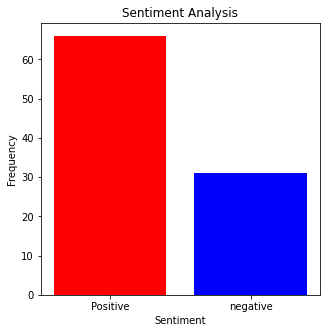

In [79]:
sentiment = data.keys()
counts = data.values()
  
fig = plt.figure(figsize = (5, 5))

plt.bar(sentiment, counts, color =['red', 'blue'])
 
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.title("Sentiment Analysis")
plt.show()

# Pie Chart

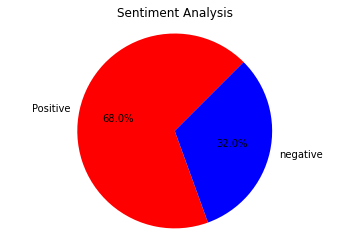

In [80]:
colors = ['red', 'blue']
plt.pie(counts, labels=sentiment, autopct='%1.1f%%', startangle=45, colors=colors)
plt.axis('equal') 
plt.title("Sentiment Analysis")
plt.show()

# Exploring Text Data

In [81]:
import nltk
#nltk.download("all")

## Counting words

In [82]:
pos_rev_tok = []
neg_rev_tok = []
for i in range(len(pos_review)):
  pos_rev_tok.append(nltk.word_tokenize(pos_review[i]))
for i in range(len(neg_review)):
  neg_rev_tok.append(nltk.word_tokenize(neg_review[i]))

In [83]:
combined_pos_review = []
combined_neg_review = []
for i in range(len(pos_rev_tok)):
  for j in range(len(pos_rev_tok[i])):
    combined_pos_review.append(pos_rev_tok[i][j])
for i in range(len(neg_rev_tok)):
  for j in range(len(neg_rev_tok[i])):
    combined_neg_review.append(neg_rev_tok[i][j])

In [84]:
print(len(combined_pos_review), "words in the positive review")
print(len(combined_neg_review), "words in the negative review")

2864 words in the positive review
1581 words in the negative review


## Frequency of words

In [85]:
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string

In [86]:
pos_frequency_dist = nltk.FreqDist(combined_pos_review)
neg_frequency_dist = nltk.FreqDist(combined_neg_review)

In [87]:
pos_sorted_values = sorted(pos_frequency_dist.values(), reverse=True) # Sort the values
pos_sorted_dict = {}

for i in pos_sorted_values:
    for k in pos_frequency_dist.keys():
        if pos_frequency_dist[k] == i:
            pos_sorted_dict[k] = pos_frequency_dist[k]
            break

print(pos_sorted_dict)

{'hotel': 118, 'good': 101, 'room': 87, 'very': 80, 'not': 53, 'stay': 51, 'staff': 48, 'station': 45, 'service': 23, 'clean': 21, 'bangalore': 20, 'railway': 19, 'get': 17, 'helpful': 16, 'city': 15, 'take': 14, 'really': 13, 'happy': 12, 'food': 11, 'comfortable': 10, 'opposite': 9, 'wife': 8, 'size': 7, 'bed': 6, 'centaur': 5, 'guest': 4, 'talk': 3, 'transport': 2, 'regular': 1}


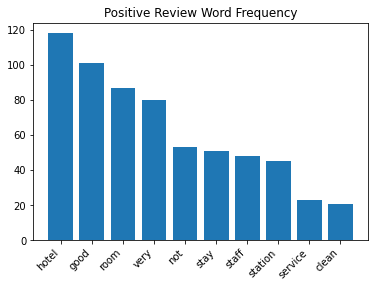

In [88]:
pos_word = list(pos_sorted_dict.keys())[:10]
pos_counts = list(pos_sorted_dict.values())[:10]
plt.bar(pos_word, pos_counts)
plt.xticks(rotation=45, ha='right')
plt.title("Positive Review Word Frequency")
plt.show()

In [89]:
neg_sorted_values = sorted(neg_frequency_dist.values(), reverse=True) # Sort the values
neg_sorted_dict = {}

for i in neg_sorted_values:
    for k in neg_frequency_dist.keys():
        if neg_frequency_dist[k] == i:
            neg_sorted_dict[k] = neg_frequency_dist[k]
            break

print(neg_sorted_dict)

{'not': 82, 'hotel': 63, 'room': 46, 'bad': 28, 'work': 21, 'stay': 17, 'no': 16, 'very': 15, 'good': 12, 'bed': 11, 'lift': 10, 'ever': 9, 'see': 8, 'railway': 7, 'station': 6, 'toilet': 5, 'give': 4, 'bus': 3, 'majestic': 2, 'valuable': 1}


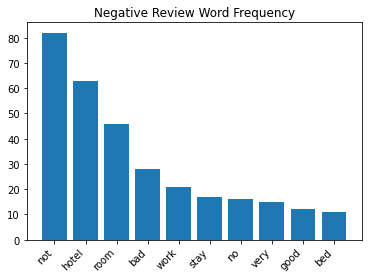

In [90]:
neg_word = list(neg_sorted_dict.keys())[:10]
neg_counts = list(neg_sorted_dict.values())[:10]
plt.bar(neg_word, neg_counts)
plt.xticks(rotation=45, ha='right')
plt.title("Negative Review Word Frequency")
plt.show()

## Word Cloud

In [91]:
!pip install wordcloud
from wordcloud import WordCloud

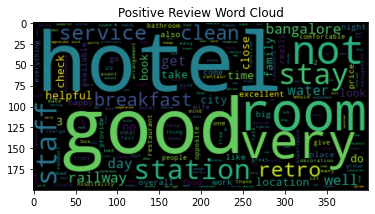

In [92]:
wcloud = WordCloud().generate_from_frequencies(pos_frequency_dist)

import matplotlib.pyplot as plt
plt.imshow(wcloud, interpolation='bilinear')
plt.title("Positive Review Word Cloud")
plt.show()

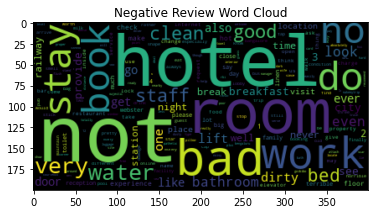

In [93]:
wcloud = WordCloud().generate_from_frequencies(neg_frequency_dist)

import matplotlib.pyplot as plt
plt.imshow(wcloud, interpolation='bilinear')
plt.title("Negative Review Word Cloud")
plt.show()